http://criminalidad.inei.gob.pe

# Imports / load data

In [1]:
import os
os.chdir('..')
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np, pandas as pd, seaborn as sns, unidecode, math, rfpimp, altair as alt
import matplotlib.pyplot as plt
from pathlib import Path
from perustats import inei_series, plots
alt.renderers.enable('notebook')
%matplotlib inline

In [50]:
df = pd.read_csv('data/processed/criminality/vaw-endes.csv', low_memory=False)
df.head(2)

,location,variable,year,value
0,Nacional,MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON A...,2009,0.236
1,Amazonas,MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON A...,2009,0.199


# Plots

In [51]:
dff = df[(df.location != 'Nacional') & (df.year != '2017(I sem)')]
dff.head(2)

,location,variable,year,value
1,Amazonas,MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON A...,2009,0.199
2,Áncash,MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON A...,2009,0.252


## Timelines

MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON AYUDA EN ALGUNA INSTITUCIÓN CUANDO FUERON MALTRATADAS FÍSICAMENTE:


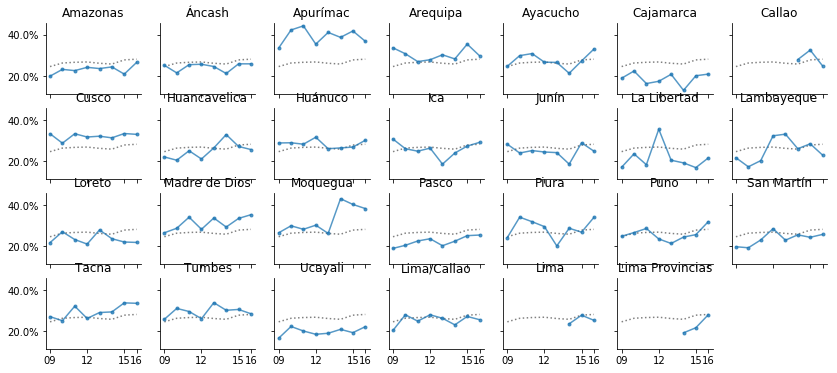

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA SEXUAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO:


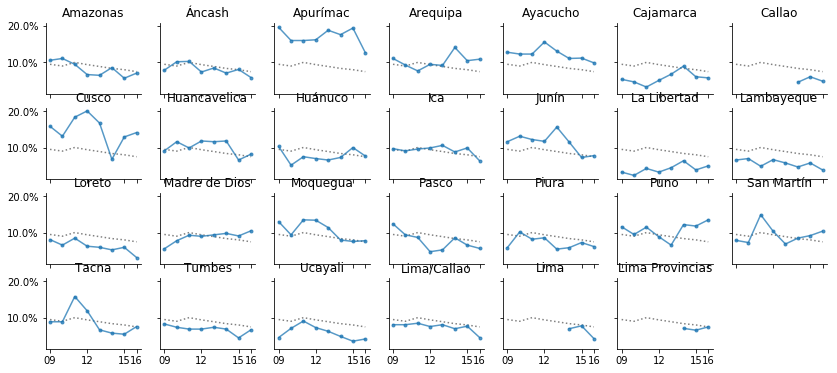

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON AYUDA  EN PERSONAS CERCANAS CUANDO FUERON MALTRATADAS FÍSICAMENTE:


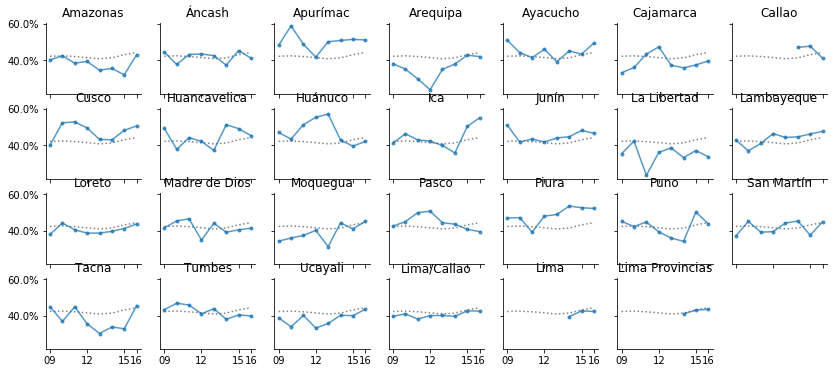

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA PSICOLÓGICA, FÍSCA Y/O SEXUAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO:


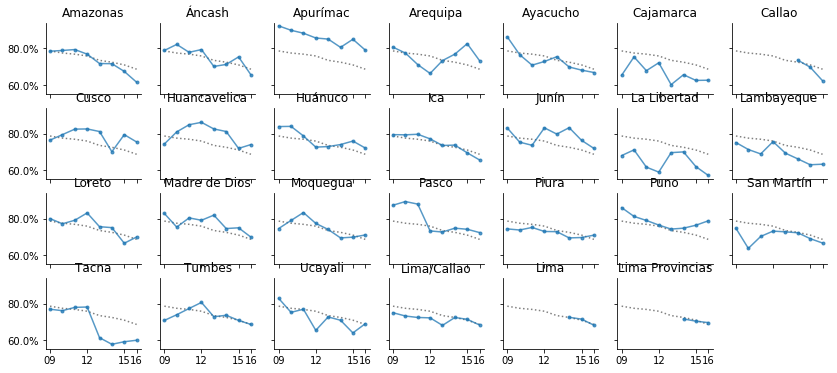

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Moretones y dolores:


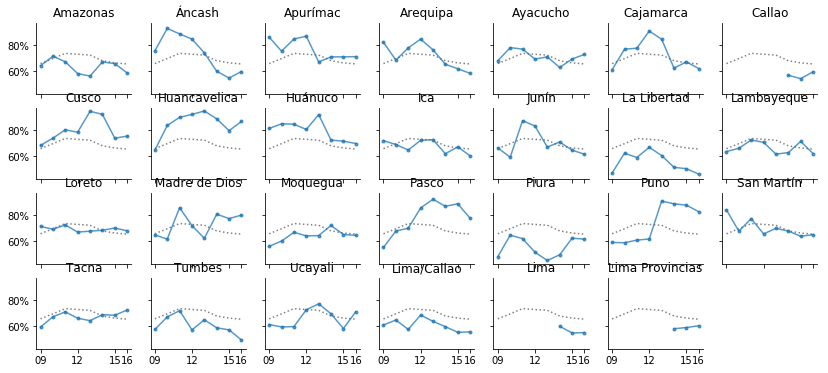

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Herida o lesión, hueso o dientes rotos, quemaduras:


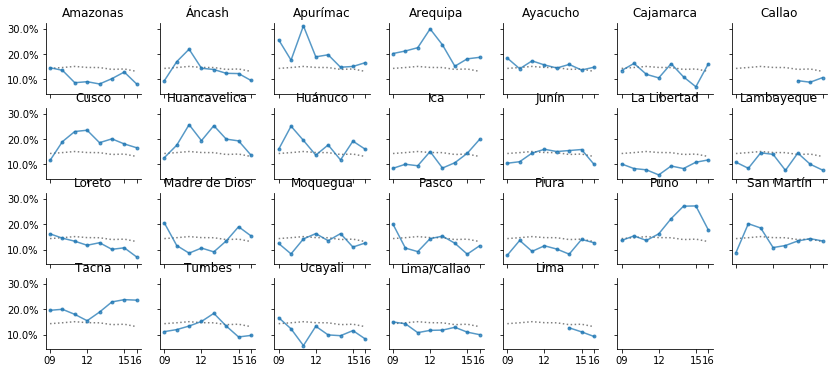

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA PSICOLÓGICA Y/O VERBAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO:


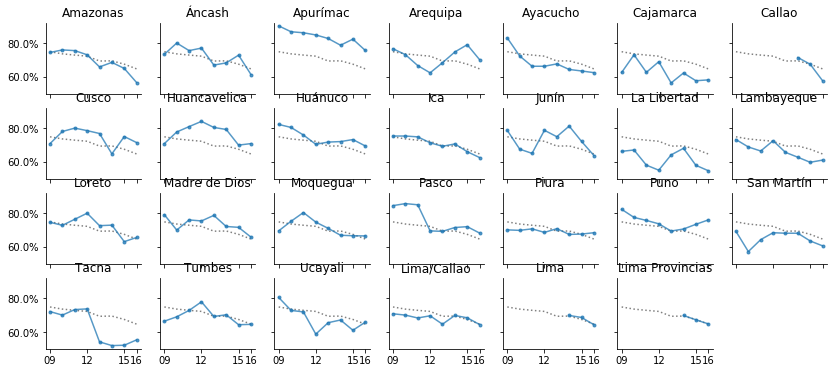

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO:


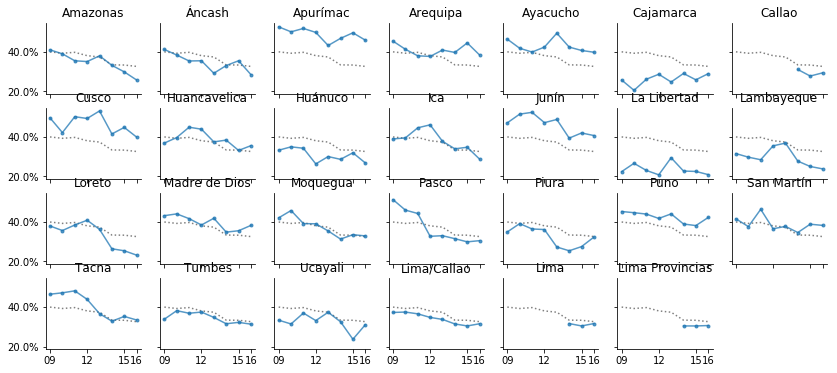

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.
MUJERES DE 15 A 49 AÑOS DE EDAD QUE SUFRIERON VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR OTRA PERSONA, APARTE DE SU ACTUAL/ÚLTIMO ESPOSO OCOMPAÑERO:


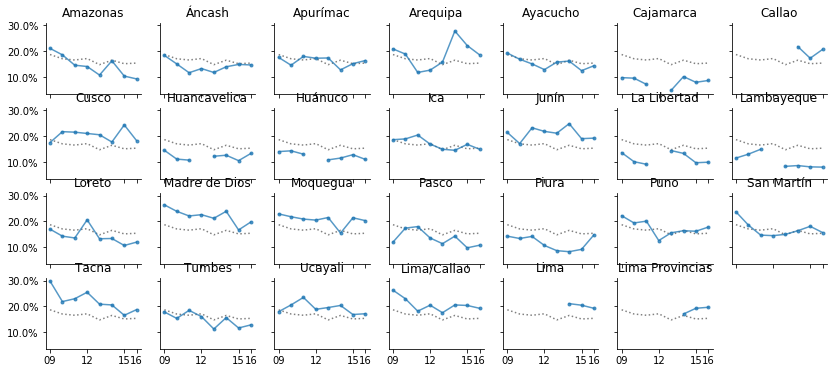

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


In [152]:
for v in df.variable.unique():
    plots.timeline_grid(dff, 'value', 'year', 'location', 'variable', v, title=v, cols=7, percentage=True)

In [154]:
print(df.variable.unique())

['MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON AYUDA EN ALGUNA INSTITUCIÓN CUANDO FUERON MALTRATADAS FÍSICAMENTE'
 'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA SEXUAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO'
 'MUJERES DE 15 A 49 AÑOS DE EDAD QUE BUSCARON AYUDA  EN PERSONAS CERCANAS CUANDO FUERON MALTRATADAS FÍSICAMENTE'
 'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA PSICOLÓGICA, FÍSCA Y/O SEXUAL, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO'
 'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Moretones y dolores'
 'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Herida o lesión, hueso o dientes rotos, quemaduras'
 'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE SUFRIERON VIOLENCIA PSICOLÓGICA Y/O VERBAL, EJERCIDA ALG

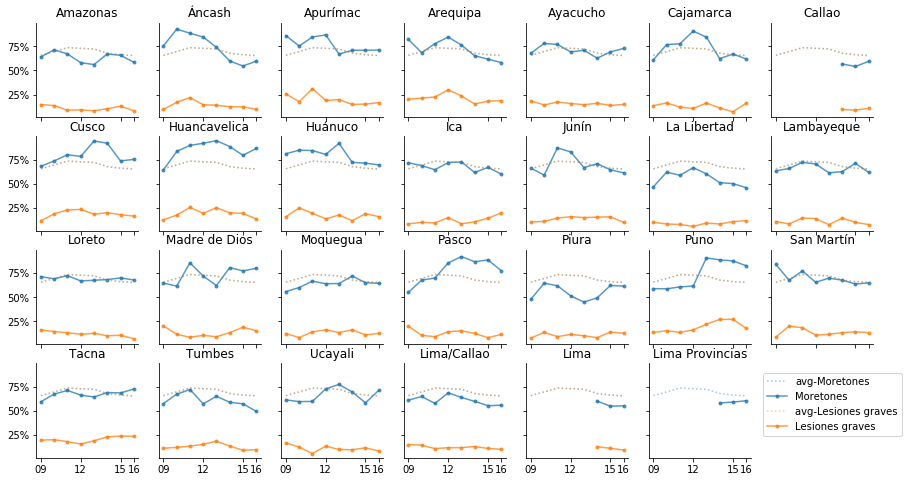

Years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016.


In [188]:
plot_vars = [
    'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Moretones y dolores',
    'MUJERES DE 15 A 49 AÑOS DE EDAD ALGUNA VEZ UNIDAS QUE TUVIERON CONSECUENCIAS DE LA VIOLENCIA FÍSICA, EJERCIDA ALGUNA VEZ POR EL ESPOSO O COMPAÑERO / Herida o lesión, hueso o dientes rotos, quemaduras'
]
plot_lbls = [
    'Moretones',
    'Lesiones graves'
]
plots.timeline_grid(dff, 'value', 'year', 'location', 'variable', plot_vars, plot_lbls, cols=7,
                    percentage=True, legend=True, fs=(15,8), legend_bbox=(3,0.9), legend_loc='upper center')

## asd